# Reproduce R. H. Blackmore, et. al, Dalton Trans., 2020,49, 232-240 

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

R. H. Blackmore, M. E. Rivas, T. Eralp Erden, T. Dung Tran, H. R. Marchbank, D. Ozkaya, M. Briceno de Gutierrez, A. Wagland, P. Collier, P. P. Wells (2018). **Understanding the mechanochemical synthesis of the perovskite LaMnO3 and its catalytic behaviour ** DOI: [10.1039/C9DT03590G](http://dx.doi.org/10.1039/C9DT03590G).

- **Corresponding authors**:  P. P. Wells
- **E-mails**: 

The data used for reproducing the results was published in the University of Southampton Institutional Repository [doi:10.5258/SOTON/D1128](http://dx.doi.org/10.5258/SOTON/D1128)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in Figures: [2](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f2_hi-res.gif), [3](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f3_hi-res.gif), [4](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f4_hi-res.gif), [5](https://pubs.rsc.org/image/article/2020/dt/c9dt03590g/c9dt03590g-f5_hi-res.gif), 
The captions and metadata for each figure can be used for reproducing the results presented.

#### Figures and Captions
>Fig. 2 XANES spectra at the (A) Mn K-edge for LaMnO3 prepared by sol–gel synthesis and ball milling after 1 and 4 hours compared to Mn2O3 precursor
with highlighted pre-edge region and (B) La L3-edge for LaMnO3 prepared by sol–gel synthesis and ball milling after 1 and 4 hours compared
to La(OH)3 precursor.
>
>Fig. 3 Non phase-corrected Fourier transform at the Mn K-edge for
LaMnO3 synthesised by sol–gel and by ball milling from 1 h and 4 h
compared to precursor Mn2O3.
>
>Fig. 4 Mn K-edge EXAFS data after (A) time 0 h of milling (Mn2O3) and after time (B) 1 h of milling (C) 4 h of milling compared to (D) sol–gel synthesized
LaMnO3 showing the magnitude and imaginary components of the k2-weighted Fourier transform data and simulated fits.
>
>Fig. 5 Non phase-corrected Fourier transform at the La L3-edge for
LaMnO3 synthesised by sol–gel and by ball milling from 1 h to 4 h compared
to the precursor La(OH)3.

#### Metadata (ReadMe_File2.txt)
>Figure 2-5:XAS data at both the (A) Mn K-edge and (B) La L3-edge for LaMnO3 prepared by sol-gel synthesis and at 1 h time slices during ball milling compared to either Mn2O3 or La(OH)3 precursor.
>
>This is in .prj file format to be opened in Arthena and Artemis software package.

In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, 
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

# custom plotting functions
import paper03_plots as c_plot3 # paper 3 has some similar plots

# custom plotting functions
import paper05_plots as c_plot 

In [2]:
la_l3_file = "./wf_data/pub_582/DS0265/Figure 2-5_ La_L3_edge_LMOA_time_series.prj" # fresh catalyst (2a)
mn_k_file = "./wf_data/pub_582/DS0265/Figure 2-5_ Mn_K_edge_LMOA_time_series.prj" # CO oxidation without H2 (2b)

la_l3_mappings = {"La Sol-gel": 'La_sol_gel',
                 "0 h": 'La_Time_0h',
                 "1 h": 'La_Time_1h',
                 "2 h": 'La_Time_2h',
                 "3 h": 'La_Time_3h',
                 "4 h": 'La_Time_4h',
                 "La(OH)3": 'La_OH_3',}

mn_k_mappings = {"LaMnO3 Sol-gel": 'Mn_Sol_gel',
                 "0 h": 'Mn_Time_0h',
                 "1 h": 'Mn_Time_1h',
                 "2 h": 'Mn_Time_2h',
                 "3 h": 'Mn_Time_3h',
                 "4 h": 'Mn_Time_4h',
                 "Mn2O3": 'Mn2O3',}

la_l3_groups = c_plot.get_groups(la_l3_file,la_l3_mappings)
mn_k_groups = c_plot.get_groups(mn_k_file,mn_k_mappings)

 do not know what to do with key 'LCF' at ''


### Reproduce 2A XANES spectra Mn K

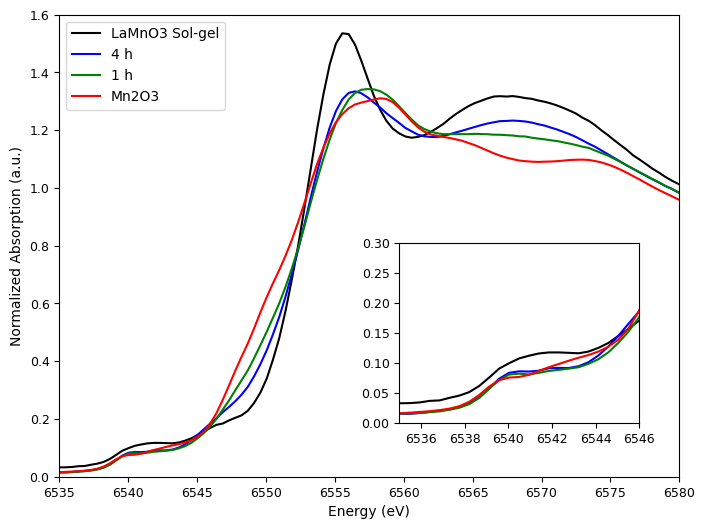

In [3]:
plot_groups = {"LaMnO3 Sol-gel":["black", "solid"], "4 h":["b", "solid"], 
               "1 h":['g', "solid"], "Mn2O3":["r", "solid"]}

plt = c_plot3.plot_normal_w_inset(mn_k_groups, plot_groups, (8,6),[6535, 6580],[0,1.6], [6535, 6546], [0.0,0.3])
plt.show()

### Reproduce 2B XANES spectra La L3

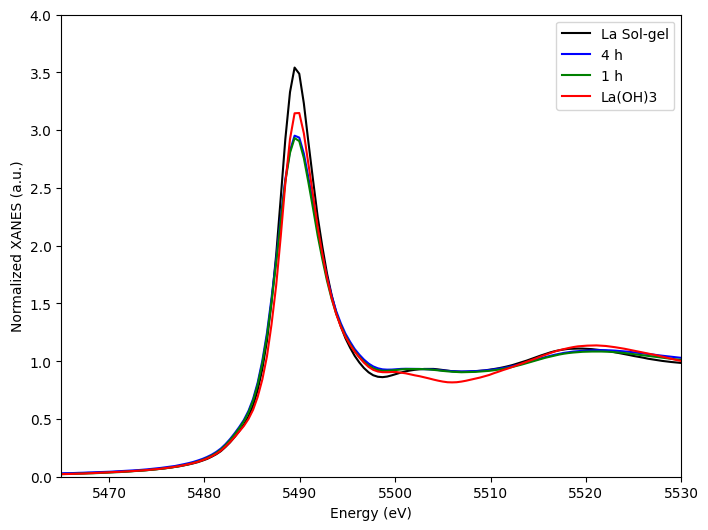

In [4]:
plot_groups = {"La Sol-gel":["black", "solid"], "4 h":["b", "solid"], 
               "1 h":['g', "solid"], "La(OH)3":["r", "solid"]}

plt = c_plot3.plot_normalised(la_l3_groups, plot_groups, (8,6),[5465, 5530],[0,4])
plt.show()

### Reproduce Figure 3 FT

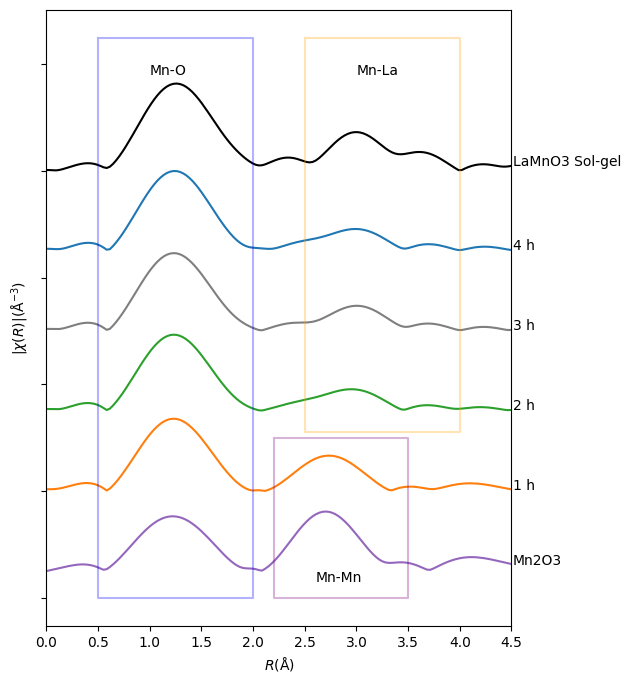

In [5]:
ft_vs  =  {'kmin':3, 
           'kmax':9, 
           'window':'hanning', 
           'kweight':2, 
           'rmin':1,
           'rmax':3, 
           'dk':1}

for a_group in mn_k_groups:
    c_plot.forward_ft(mn_k_groups[a_group],ft_vs)

plot_groups = {'LaMnO3 Sol-gel':["black","solid"], '4 h':["tab:blue","solid"], 
               '3 h':["tab:grey","solid"], '2 h':["tab:green","solid"], 
               '1 h':["tab:orange","solid"], 'Mn2O3':["tab:purple","solid"]}
v_offset = 1.5
plot_dimensions = (6,8)
line_label_x = 4.5
radius_range = [0, 4.5]

# define the highlights and labels for plotting   
d_boxes = [[[0.5, 0.5, 2.0, 2.0,0.5],[2.5, -8, -8, 2.5,2.5], 'blue',0.3],
         [[2.5, 2.5, 4.0, 4.0,2.5],[2.5, -4.9, -4.9, 2.5,2.5], 'orange', 0.3],
         [[2.2, 2.2, 3.5, 3.5,2.2],[-5.0, -8, -8, -5.0,-5.0], 'purple', 0.3],
        ]

d_labels =[[1.0, 1.8, "Mn-O"],
           [3.0, 1.8, "Mn-La"],
           [2.6, -7.7, "Mn-Mn"]
          ]

plt = c_plot.plot_chir_magnitude(athena_groups = mn_k_groups, include_groups = plot_groups, 
                          offset = v_offset, aspect = plot_dimensions, 
                          legend_x = line_label_x, xlim=radius_range, kweight=ft_vs['kweight'], 
                          h_boxes = d_boxes, h_text = d_labels)
plt.show()

### Reproduce Figure 5 FT

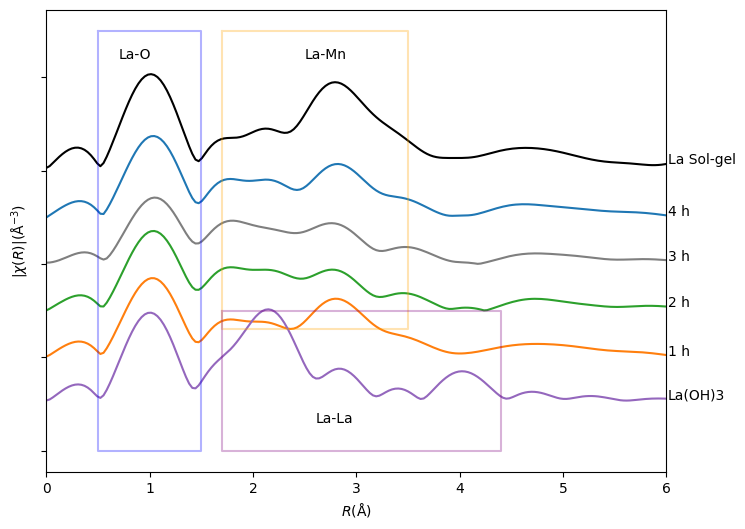

In [6]:
ft_vs  =  {'kmin':3, 
           'kmax':9, 
           'window':'hanning', 
           'kweight':2, 
           'rmin':1,
           'rmax':3, 
           'dk':1}

for a_group in la_l3_groups:
    c_plot.forward_ft(la_l3_groups[a_group],ft_vs)

plot_groups = {'La Sol-gel':["black","solid"], '4 h':["tab:blue","solid"], 
               '3 h':["tab:grey","solid"], '2 h':["tab:green","solid"], 
               '1 h':["tab:orange","solid"], 'La(OH)3':["tab:purple","solid"]}
v_offset = 0.5
plot_dimensions = (8,6)
line_label_x =6
radius_range = [0, 6]

# define the highlights and labels for plotting   
d_boxes = [[[0.5, 0.5, 1.5, 1.5,0.5],[1.5, -3, -3, 1.5,1.5], 'blue',0.3],
         [[1.7, 1.7, 3.5, 3.5,1.7],[1.5, -1.7, -1.7, 1.5,1.5], 'orange', 0.3],
         [[1.7, 1.7, 4.4, 4.4,1.7],[-1.5, -3, -3, -1.5,-1.5], 'purple', 0.3],
        ]

d_labels =[[0.7, 1.2, "La-O"],
           [2.5, 1.2, "La-Mn"],
           [2.6, -2.7, "La-La"]]

plt = c_plot.plot_chir_magnitude(athena_groups = la_l3_groups, include_groups = plot_groups, 
                          offset = v_offset, aspect = plot_dimensions, 
                          legend_x = line_label_x, xlim=radius_range, kweight=ft_vs['kweight'],
                          h_boxes = d_boxes, h_text = d_labels
                         )
    
plt.show()

### Reproduce Fig 4 EXAFS fittings

Two crystal structures are required for fitting, in addition to the data on the projects. The crystal structures were obtained from materials project. The name of the paths to select are contained in table S2 of the [supplementary material](https://www.rsc.org/suppdata/c9/dt/c9dt03590g/c9dt03590g1.pdf).

|Plot|Group|Paths|
|:---|:----|:----|
| A|Mn-K 0 h|Mn-O1,Mn-O2,Mn-Mn1,Mn-Mn2|
| B|Mn-K 1 h|Mn-O,Mn-Mn1,Mn-Mn2|
| C|Mn-K 4 h|Mn-O,Mn-La1,Mn-La2|
| D|LaMnO3 Sol-gel| Mn-O,Mn-La1,Mn-La2|

The figure presents four fittings and for each it is necessary to define: 
- a set of GDS parameters
- a set of paths
- a set of fit variables

Atoms and FEFF however can be shared for the four fittings so they are executed in the next cell

In [7]:
# Library with the functions that execute 
# Atoms and FEFF to generate scattering paths
import lib.atoms_feff as feff_runner     

# Set parameters          
# library containign functions tho manage fit, at read, write 
# GDS parameters, and scattering paths. 
import lib.manage_fit as fit_manager  

from larch import Interpreter
session = Interpreter()


crystal_files = ["./wf_data/pub_582/additional/1667441.cif",
                 "./wf_data/pub_582/additional/mp-565203_Mn2O3.cif",] 
# Need to specify the absorbing atom and maximum radius
absorbing_atoms = ["Mn","Mn"]
max_radius = 5.0

# run feff and get a list of feff dirs
feff_dirs = feff_runner.run_feff(crystal_files, absorbing_atoms, max_radius) 

# could prevent running if the files still exist and they are recent (<month old)

No conda env active, defaulting to base
Processing: ./wf_data/pub_582/additional/1667441.cif
check if need to build: 1667441_feff
 : ======== running Feff module C:\Users\scman1\AppData\Local\Programs\Python\Python39\lib\site-packages\larch\bin\win64\feff6l.exe ========
 : Feff 6L.02
 : Formula:    LaMnO3
 : SpaceGroup: Pm-3m
 : # sites:    5
 : Calculating potentials and phases...
 : free atom potential and density for atom type    0
 : free atom potential and density for atom type    1
 : free atom potential and density for atom type    2
 : free atom potential and density for atom type    3
 : overlapped potential and density for unique potential    0
 : overlapped potential and density for unique potential    1
 : overlapped potential and density for unique potential    2
 : overlapped potential and density for unique potential    3
 : muffin tin radii and interstitial parameters
 : phase shifts for unique potential    0
 : phase shifts for unique potential    1
 : phase shifts for

####  4A

In [8]:
gds_parms_a = "mn_k_0_gds.csv"
sel_paths_a = "mn_k_0_edge_sp.csv"

# variables for fit
fit_vars = {}
fit_vars['fitspace']='r'
fit_vars['kmin']=0 
fit_vars['kmax']=10
fit_vars['kw']=2 
fit_vars['dk']=1
fit_vars['window']='hanning'
fit_vars['rmin']=0.0
fit_vars['rmax']=5.0

In [9]:
# read save parameters from input gds file
gds = fit_manager.read_gds(gds_parms_a, session)
# show gsd group parameters in a spreadsheet
this_sheet = fit_manager.show_gds(gds)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_a)

Sheet(cells=(Cell(column_start=0, row_end=18, row_start=0, squeeze_column=False, squeeze_row=False, value=[['i…

In [10]:
# save gds data the csv file 
gds = fit_manager.spreadsheet_to_gds(this_sheet, session)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_a)

In [11]:
# read saved selected paths from input file
selected_paths = fit_manager.read_selected_paths_list(sel_paths_a, session)

path_sheet = fit_manager.show_feff_paths(crystal_files,selected_paths)
display(path_sheet)

Sheet(cells=(Cell(column_end=7, column_start=0, row_end=41, row_start=0, squeeze_column=False, squeeze_row=Fal…

In [12]:
sp_sheet = fit_manager.show_selected_paths(path_sheet, selected_paths)

Sheet(cells=(Cell(column_end=5, column_start=0, row_end=4, row_start=0, squeeze_column=False, squeeze_row=Fals…

In [13]:
fit_manager.save_selected_paths_list(sp_sheet, sel_paths_a)
selected_paths = fit_manager.read_selected_paths_list(sel_paths_a, session)

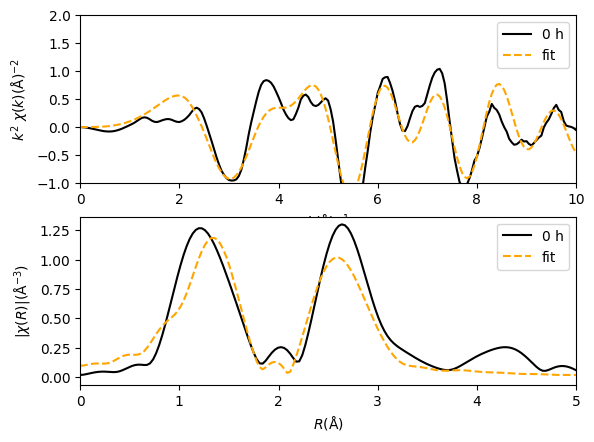

In [14]:
# run fit
trans, dset, out = fit_manager.run_fit(mn_k_groups['0 h'], gds, selected_paths, fit_vars, session)

# import custom plot functions (replicate plots in paper)
import paper01_plots as c_plots
chikr_p = c_plot.plot_dashed_fit(dset,fit_vars['rmin'],fit_vars['rmax'],fit_vars['kmin'],fit_vars['kmax'], "0 h")
chikr_p.show()

####  4B

In [15]:
gds_parms_b = "mn_k_1_gds.csv"
sel_paths_b = "mn_k_1_edge_sp.csv"

# fit vars do not change so leave as they are

# read save parameters from input gds file
gds = fit_manager.read_gds(gds_parms_b, session)
# show gsd group parameters in a spreadsheet
gds_b_sheet = fit_manager.show_gds(gds)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_b)

Sheet(cells=(Cell(column_start=0, row_end=17, row_start=0, squeeze_column=False, squeeze_row=False, value=[['i…

In [16]:
# save gds data the csv file 
gds = fit_manager.spreadsheet_to_gds(gds_b_sheet, session)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_b)

In [17]:
# read saved selected paths from input file
selected_paths = fit_manager.read_selected_paths_list(sel_paths_b, session)

path_sheet_b = fit_manager.show_feff_paths(crystal_files,selected_paths)
display(path_sheet_b)

Sheet(cells=(Cell(column_end=7, column_start=0, row_end=41, row_start=0, squeeze_column=False, squeeze_row=Fal…

In [18]:
sp_sheet_b = fit_manager.show_selected_paths(path_sheet_b, selected_paths)

Sheet(cells=(Cell(column_end=5, column_start=0, row_start=0, squeeze_column=False, squeeze_row=False, type='te…

In [19]:
fit_manager.save_selected_paths_list(sp_sheet_b, sel_paths_b)
selected_paths = fit_manager.read_selected_paths_list(sel_paths_b, session)

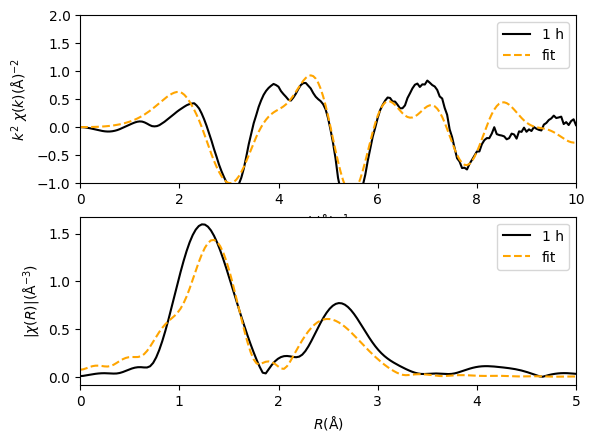

In [20]:
# run fit
trans, dset, out = fit_manager.run_fit(mn_k_groups['1 h'], gds, selected_paths, fit_vars, session)


chikr_p = c_plot.plot_dashed_fit(dset,fit_vars['rmin'],fit_vars['rmax'],fit_vars['kmin'],fit_vars['kmax'], "1 h")
chikr_p.show()

####  4C

In [21]:
gds_parms_c = "mn_k_4_gds.csv"
sel_paths_c = "mn_k_4_edge_sp.csv"

# fit vars do not change so leave as they are

# read save parameters from input gds file
gds = fit_manager.read_gds(gds_parms_c, session)
# show gsd group parameters in a spreadsheet
gds_c_sheet = fit_manager.show_gds(gds)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_c)


Sheet(cells=(Cell(column_start=0, row_end=17, row_start=0, squeeze_column=False, squeeze_row=False, value=[['i…

In [22]:
# save gds data the csv file 
gds = fit_manager.spreadsheet_to_gds(gds_c_sheet, session)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_c)

In [23]:
# read saved selected paths from input file
selected_paths = fit_manager.read_selected_paths_list(sel_paths_c, session)

path_sheet_c = fit_manager.show_feff_paths(crystal_files,selected_paths)
display(path_sheet_c)

Sheet(cells=(Cell(column_end=7, column_start=0, row_end=41, row_start=0, squeeze_column=False, squeeze_row=Fal…

In [24]:
sp_sheet_c = fit_manager.show_selected_paths(path_sheet_c, selected_paths)

Sheet(cells=(Cell(column_end=5, column_start=0, row_end=2, row_start=0, squeeze_column=False, squeeze_row=Fals…

In [25]:
fit_manager.save_selected_paths_list(sp_sheet_c, sel_paths_c)
selected_paths = fit_manager.read_selected_paths_list(sel_paths_c, session)

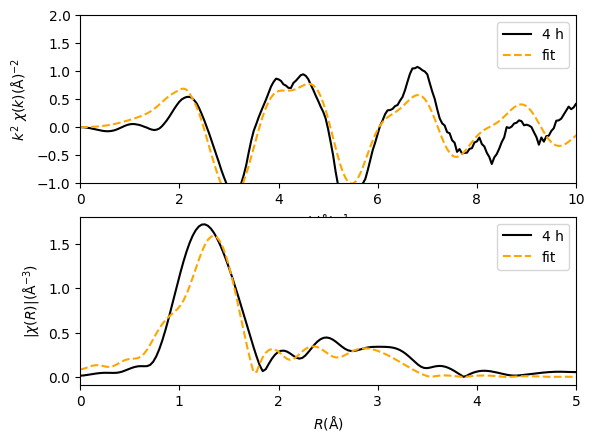

In [26]:
# run fit
trans, dset, out = fit_manager.run_fit(mn_k_groups['4 h'], gds, selected_paths, fit_vars, session)


chikr_p = c_plot.plot_dashed_fit(dset,fit_vars['rmin'],fit_vars['rmax'],fit_vars['kmin'],fit_vars['kmax'], "4 h")
chikr_p.show()

####  4D

In [27]:
gds_parms_d = "solgel_gds.csv"
sel_paths_d = "solgel_edge_sp.csv"

# fit vars do not change so leave as they are

# read save parameters from input gds file
gds = fit_manager.read_gds(gds_parms_d, session)
# show gsd group parameters in a spreadsheet
gds_d_sheet = fit_manager.show_gds(gds)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_d)


Sheet(cells=(Cell(column_start=0, row_end=17, row_start=0, squeeze_column=False, squeeze_row=False, value=[['i…

In [28]:
# save gds data the csv file 
gds = fit_manager.spreadsheet_to_gds(gds_d_sheet, session)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms_d)

In [29]:
# read saved selected paths from input file
selected_paths = fit_manager.read_selected_paths_list(sel_paths_d, session)

path_sheet_d = fit_manager.show_feff_paths(crystal_files,selected_paths)
display(path_sheet_d)

Sheet(cells=(Cell(column_end=7, column_start=0, row_end=41, row_start=0, squeeze_column=False, squeeze_row=Fal…

In [30]:
sp_sheet_d = fit_manager.show_selected_paths(path_sheet_d, selected_paths)

Sheet(cells=(Cell(column_end=5, column_start=0, row_end=2, row_start=0, squeeze_column=False, squeeze_row=Fals…

In [31]:
fit_manager.save_selected_paths_list(sp_sheet_d, sel_paths_d)
selected_paths = fit_manager.read_selected_paths_list(sel_paths_d, session)

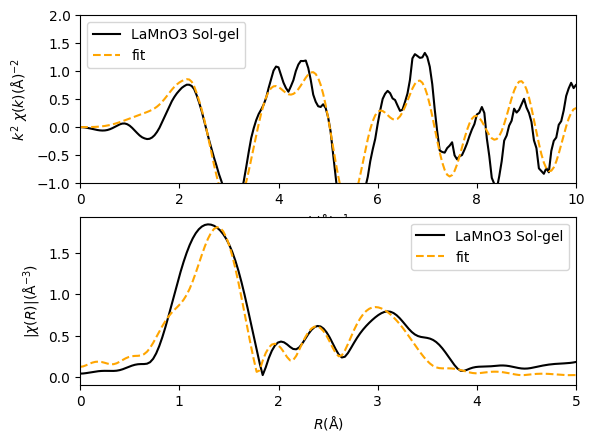

In [32]:
# run fit
trans, dset, out = fit_manager.run_fit(mn_k_groups['LaMnO3 Sol-gel'], gds, selected_paths, fit_vars, session)

chikr_p = c_plot.plot_dashed_fit(dset,fit_vars['rmin'],fit_vars['rmax'],fit_vars['kmin'],fit_vars['kmax'], "LaMnO3 Sol-gel")
chikr_p.show()

## Reproducibility of results

All of the results can be reproduced. however there is a small issue regarding which crystal files to use. These are not included in the published dataset.

Pending contactiong authors for validation of process.
